#  SRB Collection Analysis
Notebook for statistical analysis of data collected from videos

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Load Dataset

In [2]:
path = '../datasets/preprocessed/'
stim = pd.read_hdf(path+'relationalDatabase.h5', 'Events').set_index('index')
stim.drop(labels=['MotiveExpTimeSecs'], axis=1, inplace=True)

stim.head(3)

,Frame,Time,visible,speed,session_id
index,,,,,
0,0,0.000000,0,0.0,0
1,0,0.000000,0,0.0,0
2,1,0.004167,0,0.0,0


In [3]:
rat = pd.read_hdf(path+'velocityDatabase.h5', 'Rat_Behavior').set_index('index')
rat.head(3)

,Frame,Time,X_Pos,Y_Pos,Z_Pos,X_Ori,Y_Ori,Z_Ori,session_id,Filtered,Theta,U,U_var
index,,,,,,,,,,,,,
1,21,0.087500,-0.056324,0.072395,-0.049580,-0.630137,-0.768168,0.025253,0,0,-87.705039,156.977244,NaN
2,22,0.091667,-0.056285,0.072442,-0.049525,-0.630120,-0.767833,0.032642,0,0,-87.034598,160.892886,NaN
3,23,0.095833,-0.056241,0.072488,-0.049468,-0.629928,-0.767622,0.040258,0,0,-86.343297,165.938758,NaN


In [4]:
SRB = pd.read_hdf(path+'SRB.h5', 'Rat_Behavior').set_index('index')
SRB.head(3)

,Frame,Time,X_Pos,Y_Pos,Z_Pos,X_Ori,Y_Ori,Z_Ori,session_id,Filtered,Theta,U,U_var,visible,speed,SRB_id
index,,,,,,,,,,,,,,,,
0,37440,156.000010,0.093441,0.165644,-0.054762,0.879993,0.424692,-0.212234,0,0,103.559478,-9.052831,2.093787,1,-14.0,0
1,37441,156.004177,0.093453,0.165645,-0.054730,0.880194,0.424575,-0.211656,0,0,103.520946,-9.246986,2.068201,1,-14.0,0
2,37442,156.008343,0.093482,0.165663,-0.054691,0.880144,0.424881,-0.211242,0,0,103.496176,-5.945695,2.043517,1,-14.0,0


## Statistical evaluation

### Distribution of Velocities in SRB

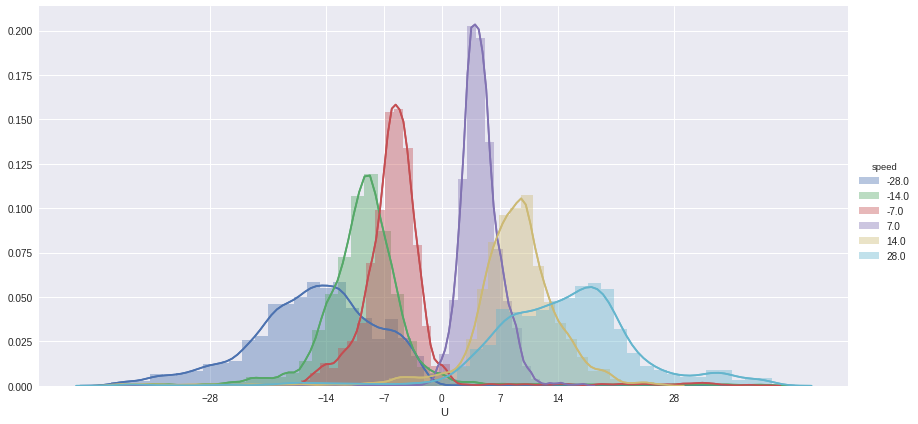

In [5]:
mask = np.abs(SRB.U) < 40
SRB_lim = SRB[mask]
g = sns.FacetGrid(data=SRB_lim, size=6, aspect=2, hue='speed');
g.set(xticks=[-28, -14, -7, 0, 7, 14, 28])
g.map(sns.distplot, 'U');
g.map(sns.kdeplot, 'U').add_legend()

## Distribition of velocities for each session

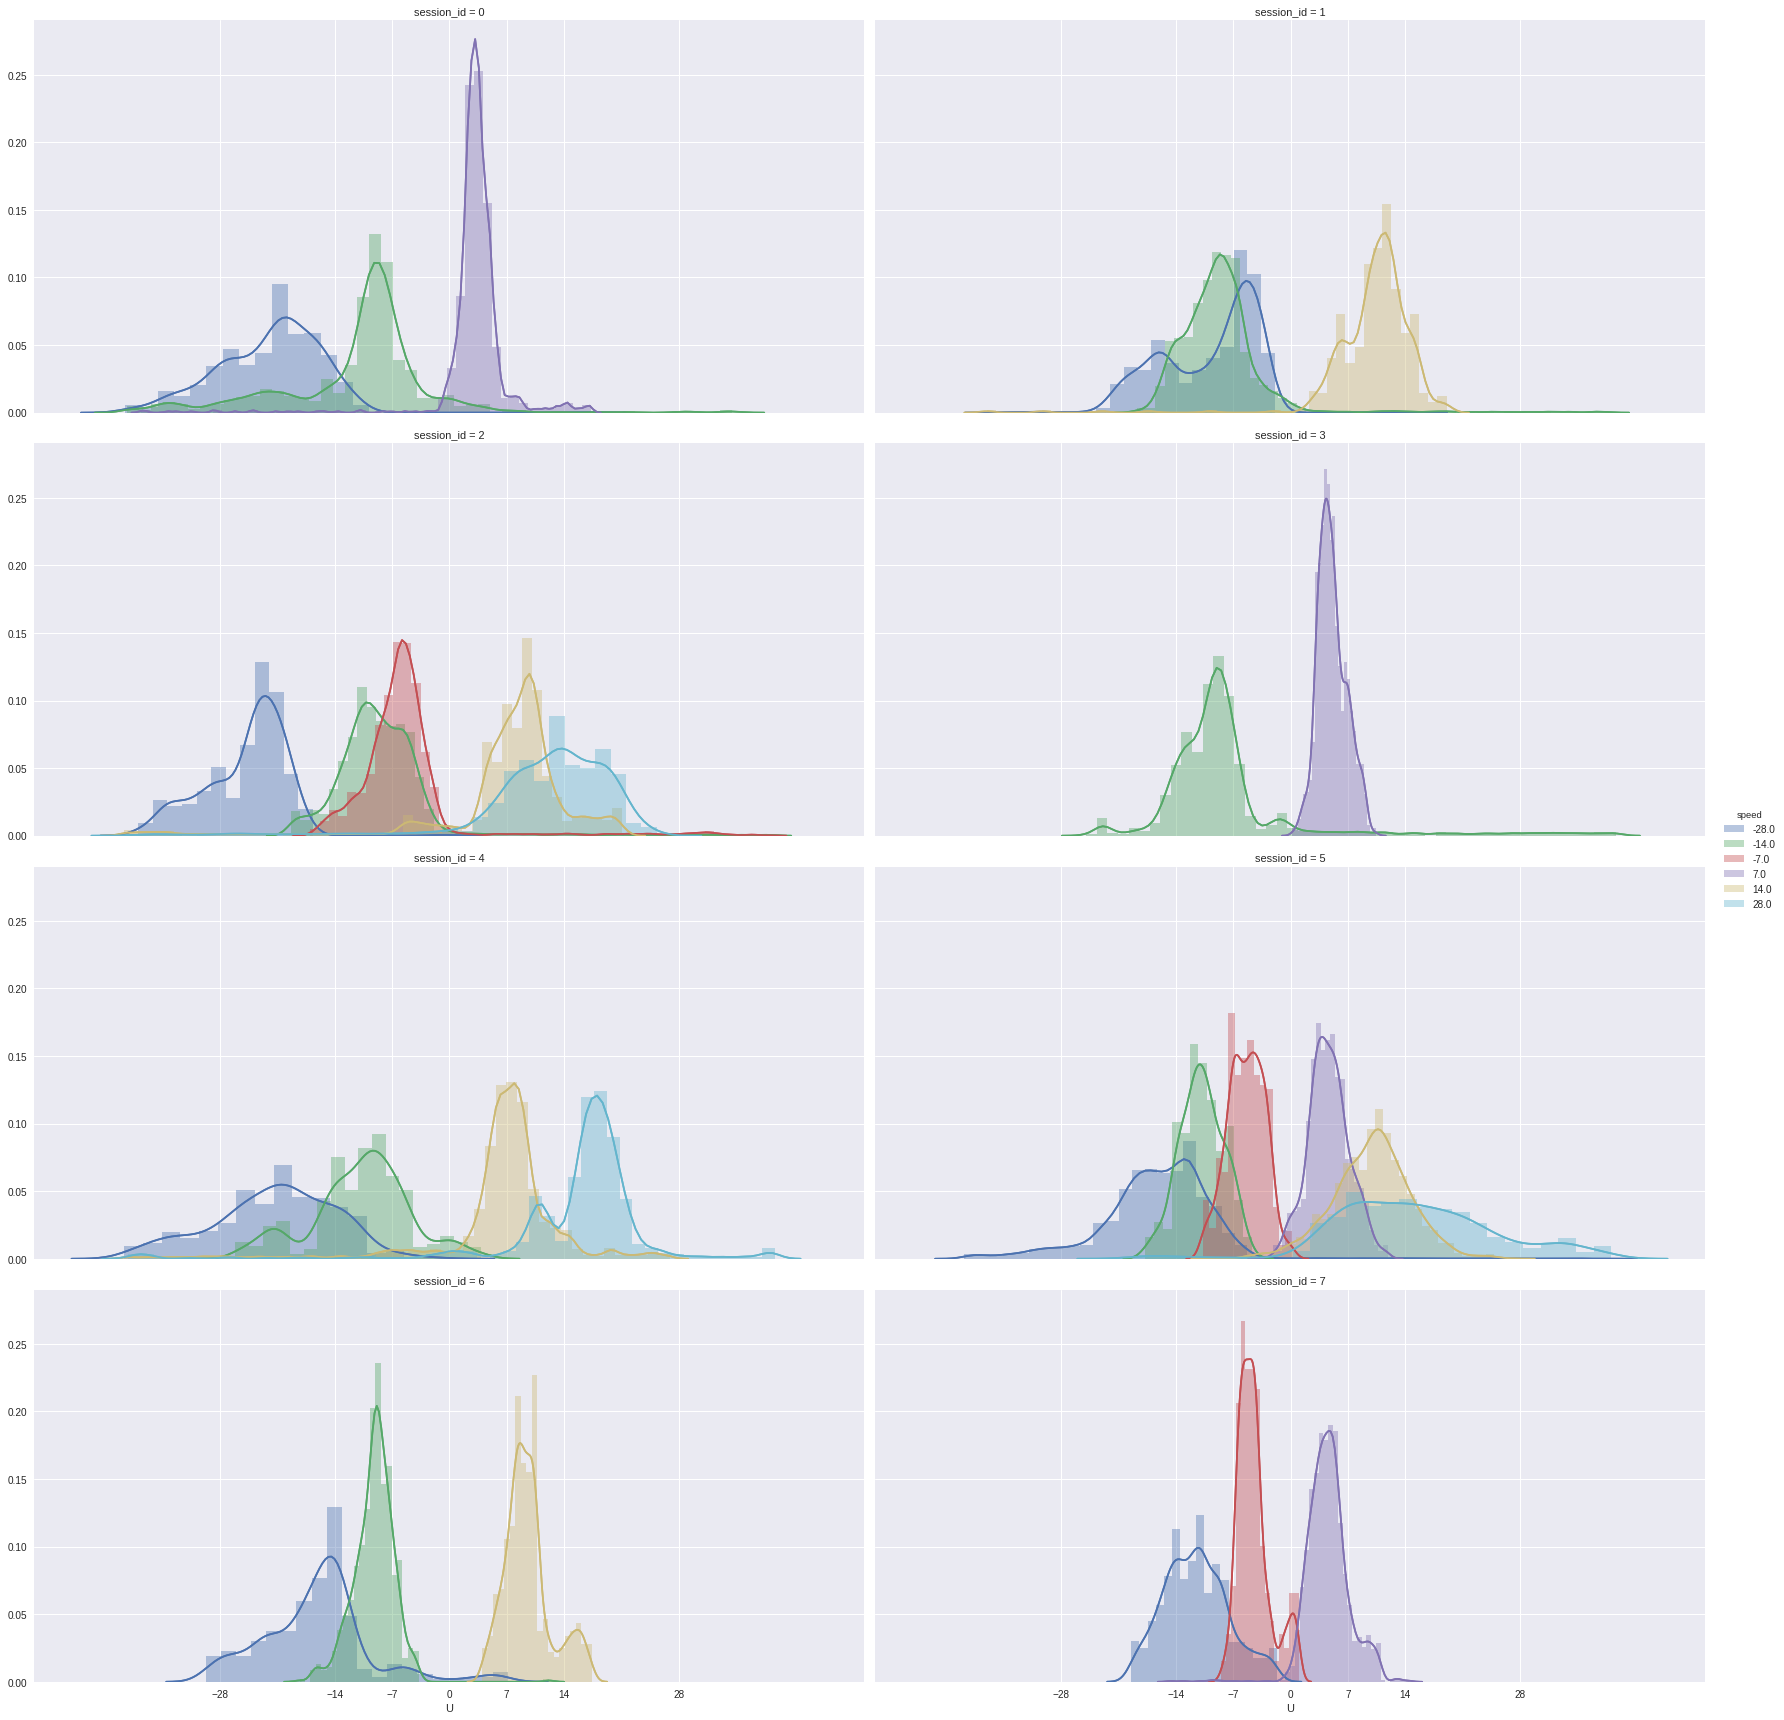

In [6]:
mask = np.abs(SRB.U) < 40
SRB_lim = SRB[mask]
g = sns.FacetGrid(data=SRB_lim, size=6, aspect=2, hue='speed', col='session_id', col_wrap=2);

g.map(sns.distplot, 'U');
g.set(xticks=[-28, -14, -7, 0, 7, 14, 28])
g.map(sns.kdeplot, 'U').add_legend()

## SRB vs Rat analysis

In [7]:
len_rat = len(rat)
len_SRB = len(SRB)
len_SRB

30934

In [8]:
'SRB of all experiments: {:.3%}'.format(len_SRB/len_rat)

'SRB of all experiments: 2.434%'

In [9]:
for Id in SRB.session_id.unique():
    p = len(SRB[SRB.session_id == Id]) / len(rat[rat.session_id == Id])
    print('SRB of session {:1}: {:.3%}'.format(Id, p) )

SRB of session 0: 1.995%
SRB of session 1: 2.165%
SRB of session 2: 3.568%
SRB of session 3: 1.281%
SRB of session 4: 2.175%
SRB of session 5: 5.629%
SRB of session 6: 0.997%
SRB of session 7: 2.081%


## SRB analysis

In [10]:
for s in SRB.speed.unique():
    mask_temp = (SRB.speed == s)
    p = len(SRB[mask_temp]) / len_SRB
    print('Speed {:1} SRB: {:.3%}'.format(s, p) )

Speed -14.0 SRB: 21.808%
Speed -28.0 SRB: 24.753%
Speed 7.0 SRB: 18.074%
Speed 14.0 SRB: 16.787%
Speed -7.0 SRB: 8.302%
Speed 28.0 SRB: 10.277%


In [11]:
SRB_session = pd.DataFrame()

for Id in SRB.session_id.unique():
    for s in SRB.speed.unique():
        mask_temp = (SRB.speed == s) & (SRB.session_id == Id)
        p = len(SRB[mask_temp]) / len(SRB[SRB.session_id == Id])
        
#         print('Session {:1} and speed {:1} SRB: {:.3%}'.format(Id, s, p) )
        
        temp = pd.DataFrame({'session_id': [Id], 'speed': [s], 'SRB':[p * 100]})
        SRB_session = pd.concat([SRB_session, temp])
        
SRB_session

,SRB,session_id,speed
0,31.264916,0,-14.0
0,25.775656,0,-28.0
0,42.959427,0,7.0
0,0.000000,0,14.0
0,0.000000,0,-7.0
0,0.000000,0,28.0
0,40.955631,1,-14.0
0,46.416382,1,-28.0
0,0.000000,1,7.0
0,12.627986,1,14.0


## Per experiment analysis
Looking for duration and angle of each SRB

In [12]:
mask00 = (SRB.session_id == 0) & (SRB.SRB_id == 0)
srb00 = SRB[mask00]
srb00.head(2)

,Frame,Time,X_Pos,Y_Pos,Z_Pos,X_Ori,Y_Ori,Z_Ori,session_id,Filtered,Theta,U,U_var,visible,speed,SRB_id
index,,,,,,,,,,,,,,,,
0,37440,156.000010,0.093441,0.165644,-0.054762,0.879993,0.424692,-0.212234,0,0,103.559478,-9.052831,2.093787,1,-14.0,0
1,37441,156.004177,0.093453,0.165645,-0.054730,0.880194,0.424575,-0.211656,0,0,103.520946,-9.246986,2.068201,1,-14.0,0


In [13]:
srb00r = srb00.reset_index()
dtheta = srb00r.Theta.iloc[-1] - srb00r.Theta.iloc[0]
dtheta

-13.99695774425561

In [14]:
dtime = srb00r.Time.iloc[-1] - srb00r.Time.iloc[0]
dtime

2.4958329999999762

In [15]:
## build one dataframe wih session_id, srb_id, dtheta, dtime, speed
SRB_dur = pd.DataFrame()

for Id in SRB.session_id.unique():
    srb00 = SRB[SRB.session_id == Id]
    for sId in srb00.SRB_id.unique():
        srb00r = srb00[srb00.SRB_id == sId].reset_index()
    
        speed  = srb00r.speed.iloc[0]
        dtime  = srb00r.Time.iloc[-1]  - srb00r.Time.iloc[0]
        
        dtheta = srb00r.Theta.iloc[-1] - srb00r.Theta.iloc[0]
        if dtheta > np.degrees(5.5):
            dtheta = 360 - dtheta
        elif dtheta < np.degrees(-5.5):
            dtheta = 360 + dtheta
        
        temp = pd.DataFrame({'session_id': [Id], 'SRB_id': [sId], 'dtheta':[dtheta], 'dtime':[dtime], 'speed':[speed]})
        SRB_dur = pd.concat([SRB_dur, temp])

SRB_dur.head(2)

,SRB_id,dtheta,dtime,session_id,speed
0,0,-13.996958,2.495833,0,-14.0
0,1,-30.280229,1.195834,0,-28.0


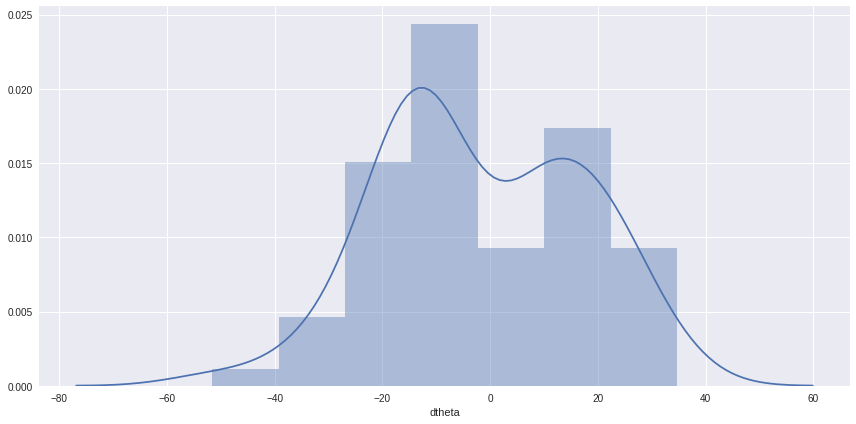

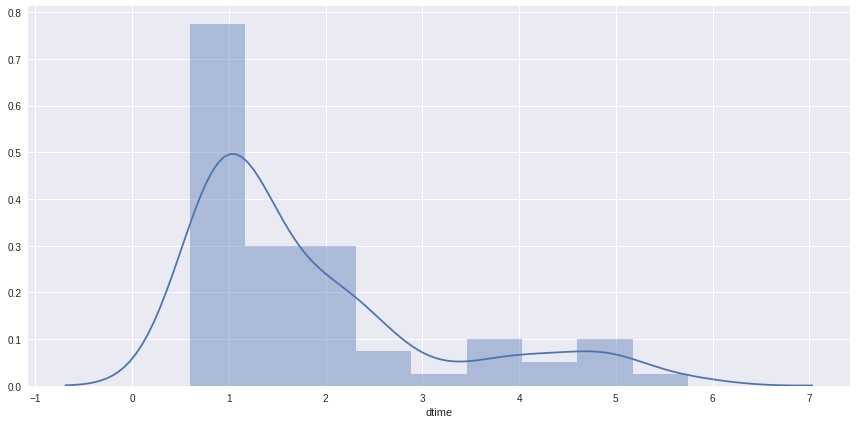

In [16]:
g = sns.FacetGrid(data=SRB_dur,  size=6, aspect=2)
g.map(sns.distplot, 'dtheta')
g = sns.FacetGrid(data=SRB_dur,  size=6, aspect=2)
g.map(sns.distplot, 'dtime')


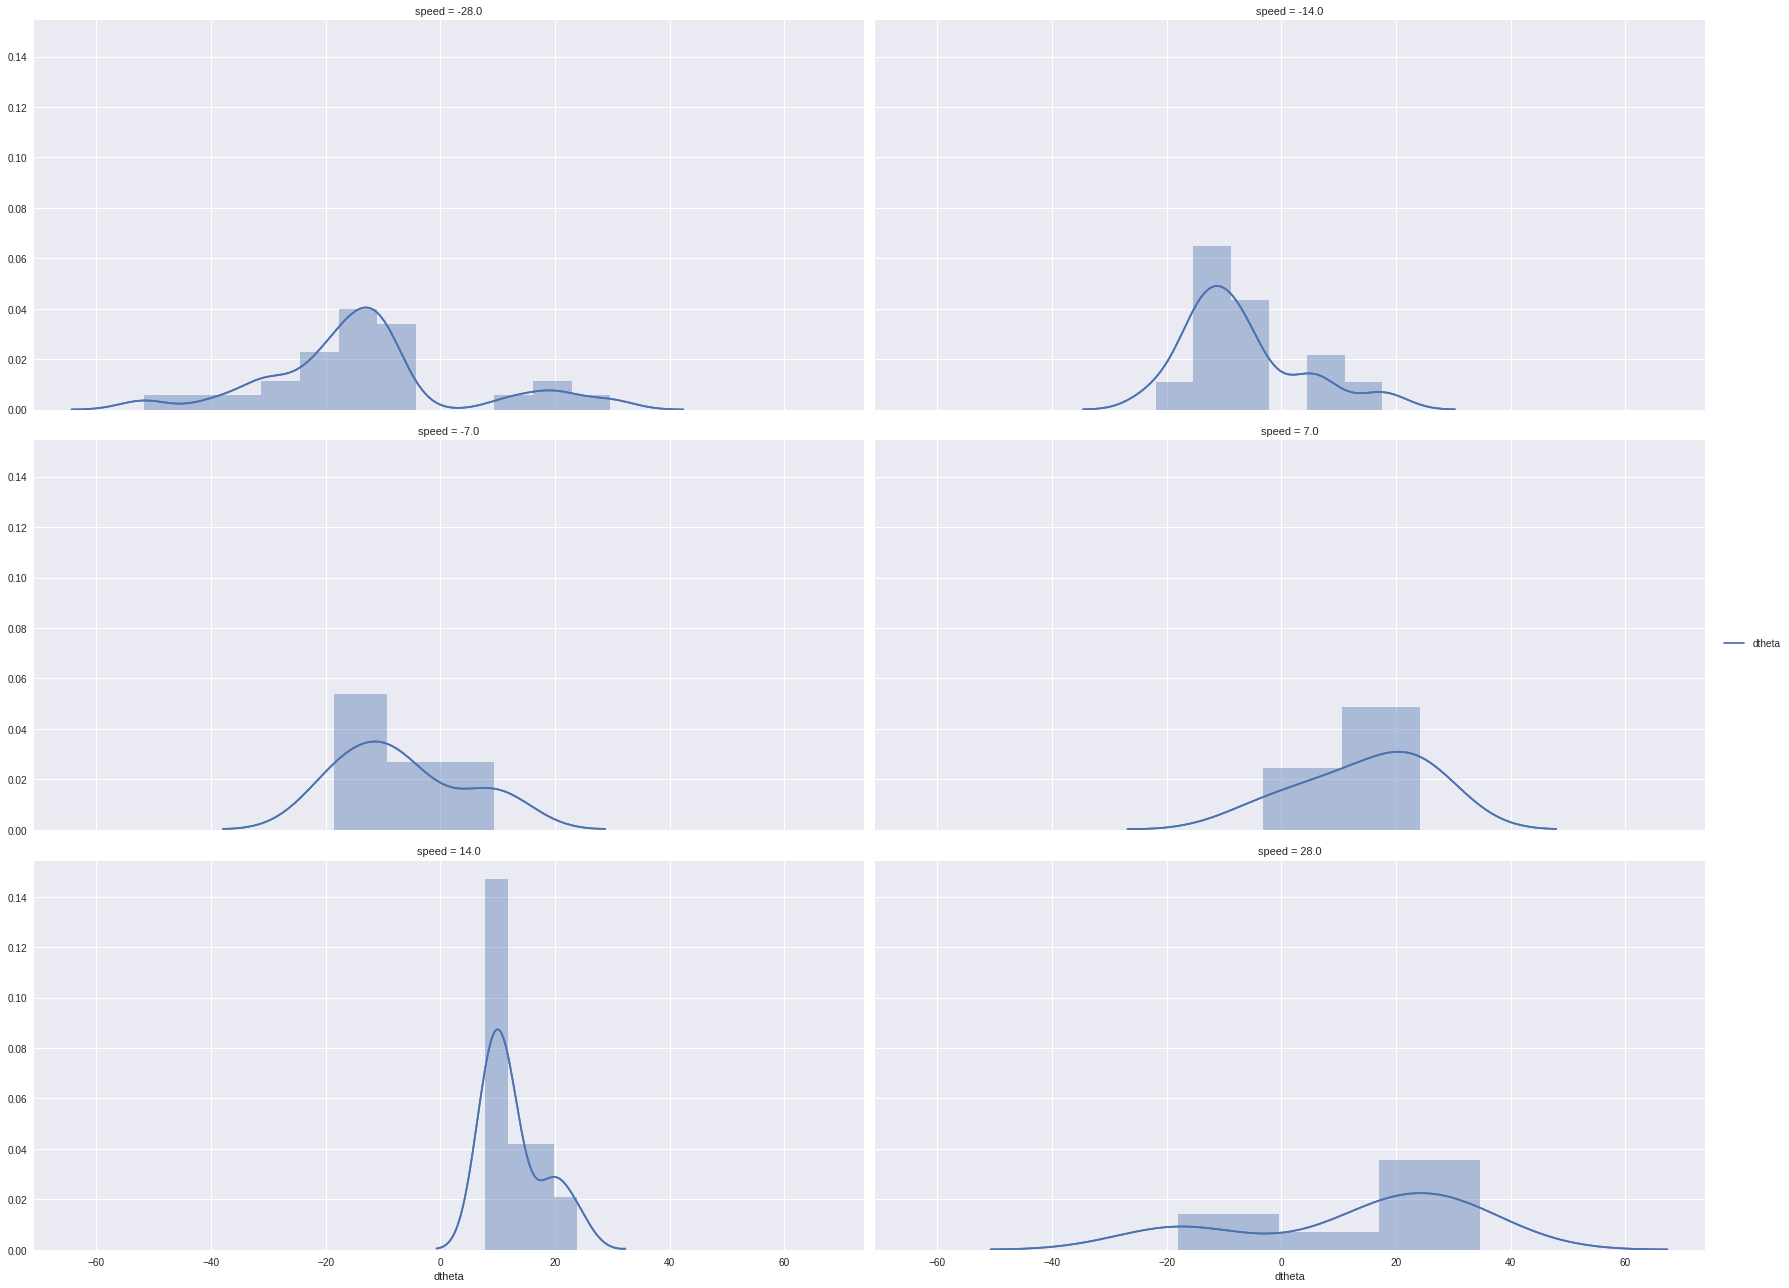

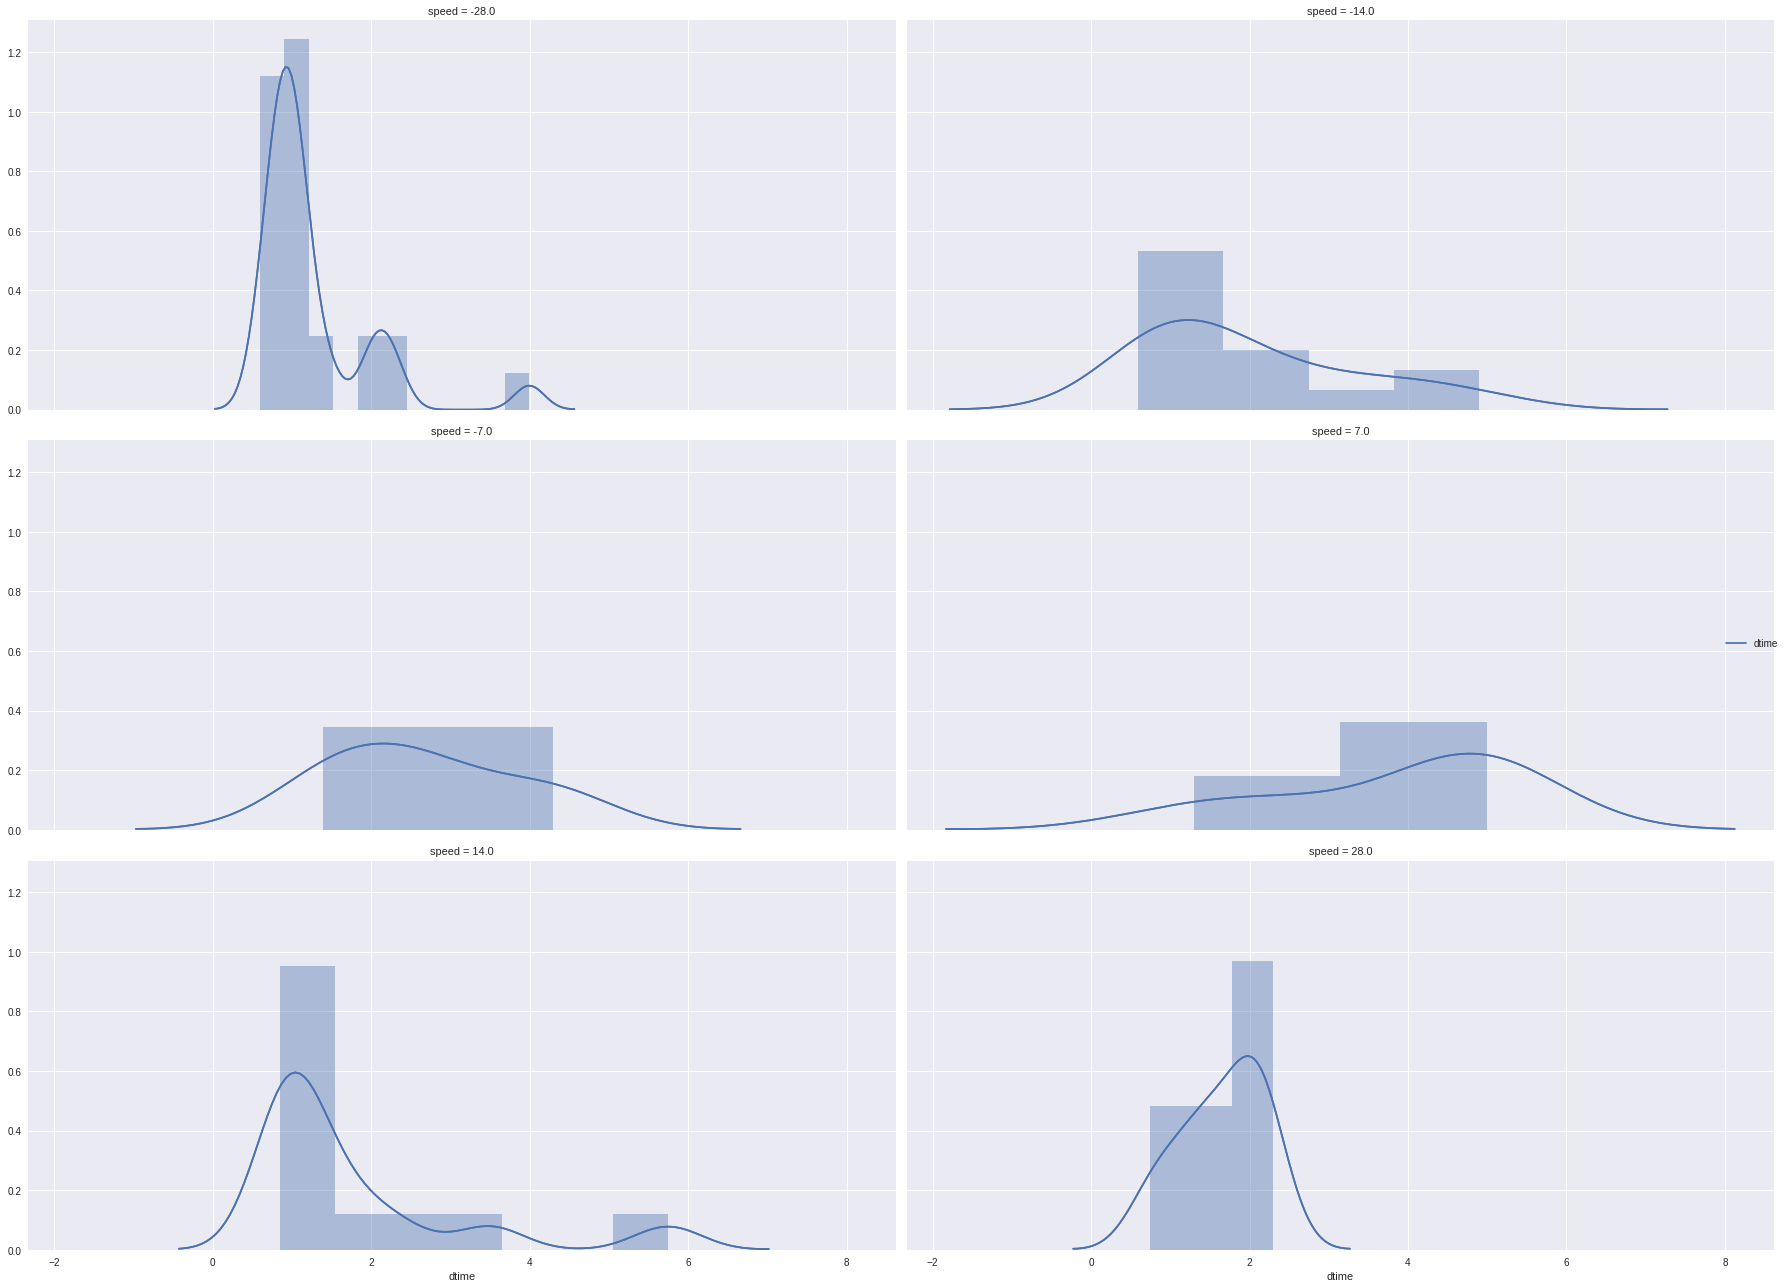

In [17]:
g = sns.FacetGrid(data=SRB_dur,  size=6, aspect=2, col='speed', col_wrap=2);
g.map(sns.distplot, 'dtheta');
g.map(sns.kdeplot, 'dtheta').add_legend();

g = sns.FacetGrid(data=SRB_dur,  size=6, aspect=2, col='speed', col_wrap=2);
g.map(sns.kdeplot, 'dtime').add_legend();
g.map(sns.distplot, 'dtime');

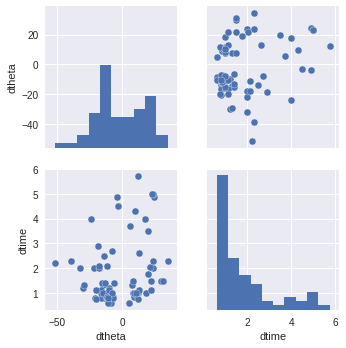

In [18]:
sns.pairplot(SRB_dur, vars=['dtheta', 'dtime'])
